# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1
In the NSL simulator code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

### Exercise 07.2

Use the NSL simulator code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

grafico per le 3 fasi, in cui plotto ascisse dimensione del blocco, ascisse l'incertezza del blocco. Incertezza cresce e poi satura quando finisce l'autocorrelazione.
genero 500k dati, e poi analizzo questi stessi dati, scelto divisori di 500k esatti

In [30]:
import numpy as np
import matplotlib.pyplot as plt

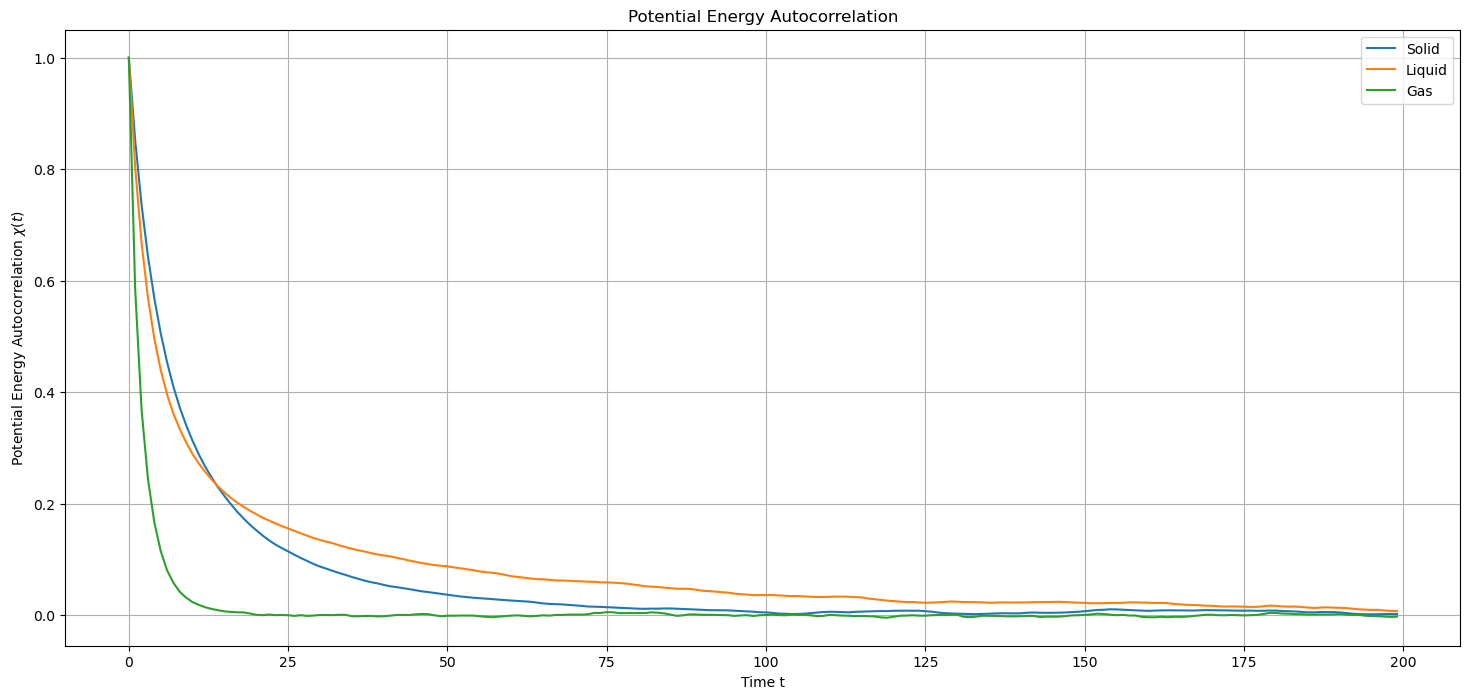

In [31]:
# 7.2.1

phase = ["Solid", "Liquid", "Gas"]

plt.figure(figsize = (18,8)) # figsize=(width, height)
M = 500000
data= np.array([np.zeros(M),np.zeros(M),np.zeros(M)])

for i,p in enumerate(phase):
    data[i] = np.loadtxt("../DATA/Autocorr/" + p + "/potential_energy.dat", usecols=(1), skiprows=1, unpack=True)
    
    time = np.arange(0,200,1)
    tmax = len(data[i])
    variance = np.sum((data[i] - np.mean(data[i]))**2) / len(data[i])

    autocorr = np.zeros(len(time))

    for j,t in enumerate(time):
        num = np.sum(data[i][:tmax-t]*data[i][t:]) /(tmax-t)
        num -= np.sum(data[i][:tmax-t]) * np.sum(data[i][t:]) / (tmax-t)**2
        autocorr[j] = num / variance

    plt.plot(time, autocorr, label=p)
plt.xlabel("Time t")
plt.ylabel("Potential Energy Autocorrelation $\chi(t)$")
plt.title("Potential Energy Autocorrelation")
# plt.xscale("log")
# plt.yscale("log")
plt.grid()
plt.legend()
plt.show()

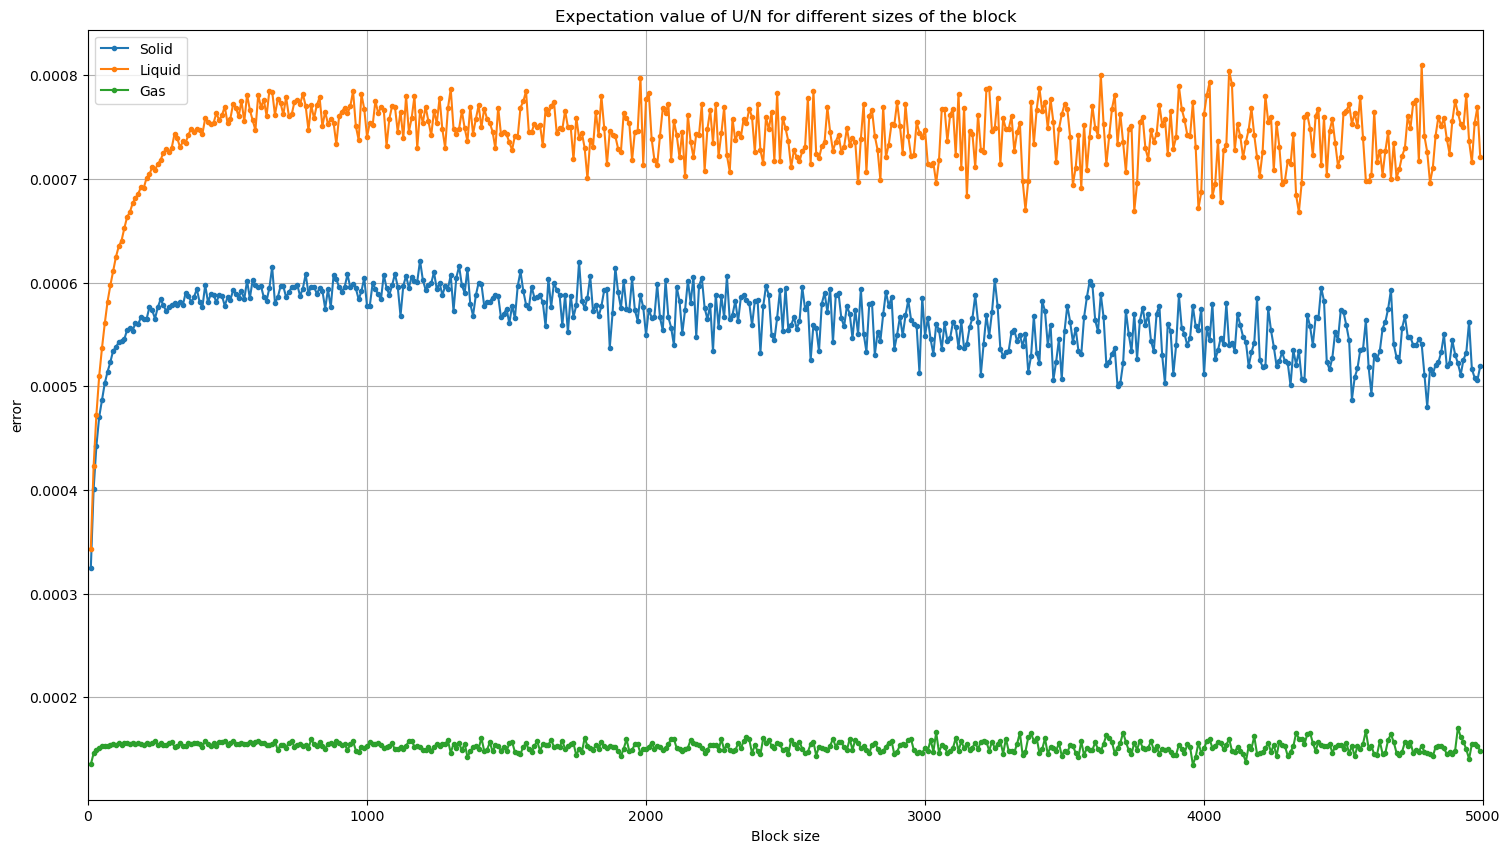

In [32]:
#7.2.2

def data_blocking(y):
    """
    Calculate the error using the data blocking method.

    Parameters:
    - y: 2D array containing data divided into blocks.

    Returns:
    - error: Statistical error calculated using the data blocking method.
    """
    # Calculate the mean of each sub-array
    block_means = np.mean(y, axis=1)
    
    # Calculate the global average and global average squared
    glob_av = np.mean(block_means)
    glob_av2 = np.mean(block_means**2)
    
    # Calculate the error
    blocks = len(y)
    error = np.sqrt((glob_av2 - glob_av**2) / (blocks - 1))
    return error

plt.figure(figsize=(18, 10))

for i, p in enumerate(phase):
    plt.title("Statistical error - " + p, size='xx-large', weight='bold')

    y = data[i]
    L = np.arange(10, 5000, 10)
    err = np.zeros(len(L))  # Pre-allocate memory for the error array

    for i, Len in enumerate(L):
        N= int(len(y) / Len)
        # N = len(y) // Len # floor division to get the number of blocks
        m = np.array_split(y[:N*Len], N)  # Ensure each block has exactly Len elements
        err[i] = data_blocking(m)

    plt.plot(L, err, marker='.', linestyle='-', label=p)

plt.title('Expectation value of U/N for different sizes of the block')
plt.xlabel('Block size')
plt.ylabel('error')
plt.grid(True)
plt.xlim(0, 5000)
plt.legend()
plt.show()


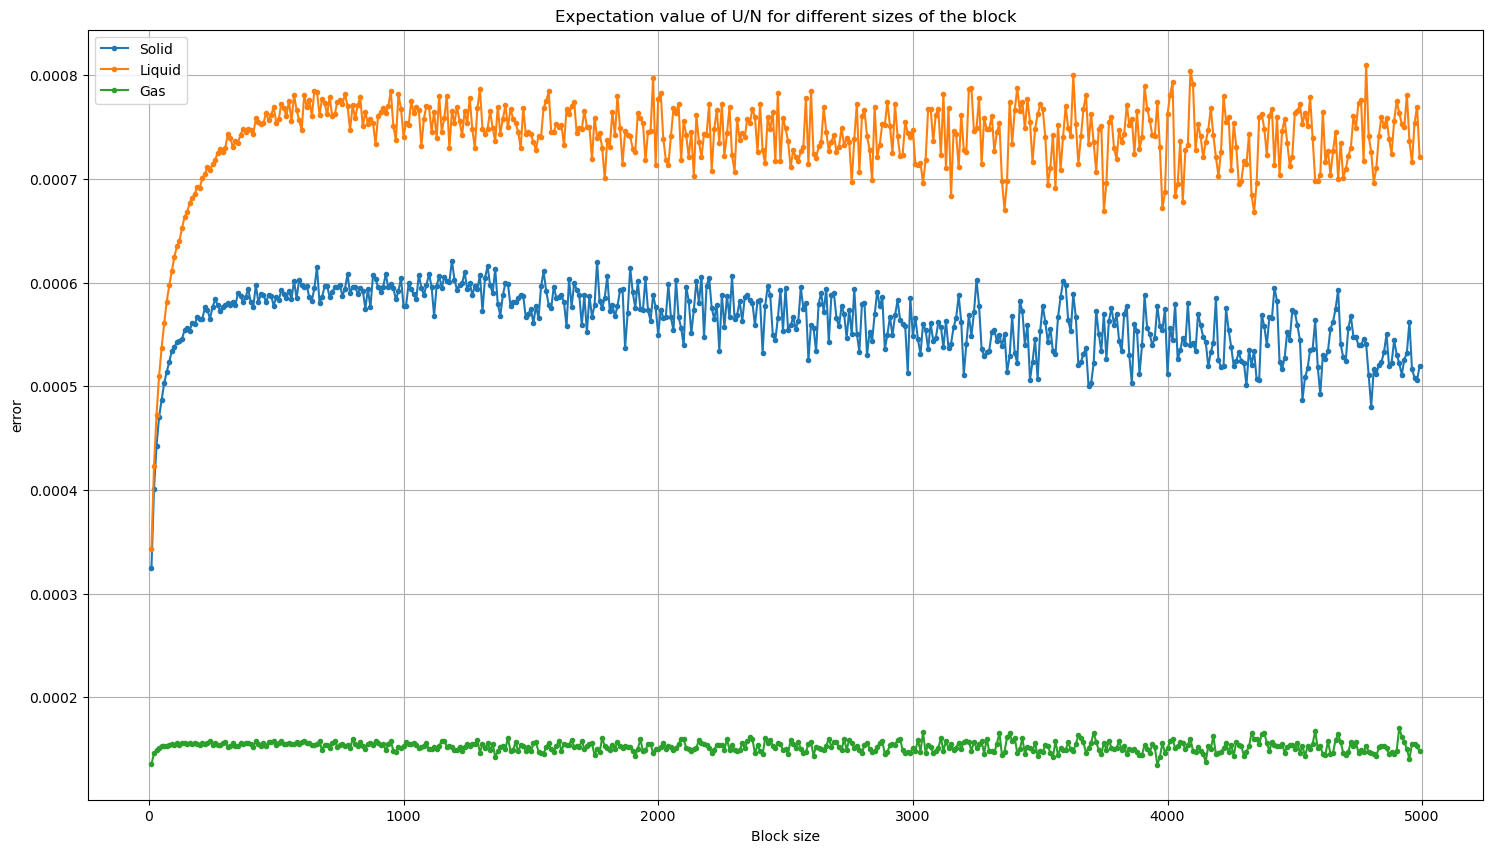

Optimized version execution time: 0.33161234855651855


In [33]:
import time

start_time = time.time()

def data_blocking(y):
    """
    Calculate the error using the data blocking method.

    Parameters:
    - y: 2D array containing data divided into blocks.

    Returns:
    - error: Statistical error calculated using the data blocking method.
    """
    # Calculate the mean of each block directly without splitting
    block_means = np.mean(y, axis=1) # Calculate the mean of each sub-array
    
    # Calculate the global average and global average squared
    glob_av = np.mean(block_means)
    glob_av2 = np.mean(block_means**2)
    
    # Calculate the error
    blocks = len(y)
    error = np.sqrt((glob_av2 - glob_av**2) / (blocks - 1))
    return error

plt.figure(figsize=(18, 10))

for p, y in zip(phase, data): # Loop over the phase and data arrays simultaneously
    plt.title("Statistical error - " + p, size='xx-large', weight='bold')

    L = np.arange(10, 5000, 10)
    err = np.zeros(len(L))  # Pre-allocate memory for the error array

    for i, Len in enumerate(L):
        N = len(y) // Len 
        y_reshaped = y[:N*Len].reshape((N, Len))  # Reshape data array for vectorized calculation
        err[i] = data_blocking(y_reshaped)

    plt.plot(L, err, marker='.', linestyle='-', label=p)

plt.title('Expectation value of U/N for different sizes of the block')
plt.xlabel('Block size')
plt.ylabel('error')
plt.grid(True)
# plt.xlim(0, 5000)
plt.legend()
plt.show()

end_time = time.time()
optimized_time = end_time - start_time
print("Optimized version execution time:", optimized_time)


### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the NSL simulator code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

`input.dat` file for Gas, Liquid and Solid
```bash
SIMULATION_TYPE        1
RESTART                0
TEMP                   1.2 / 1.1 / 0.8
NPART                  108
RHO                    0.05 / 0.8 / 1.1
R_CUT                  5.0 / 2.5 / 2.2
DELTA                  6 / 0.1 / 0.05
NBLOCKS                50
NSTEPS                 2000

ENDINPUT

```

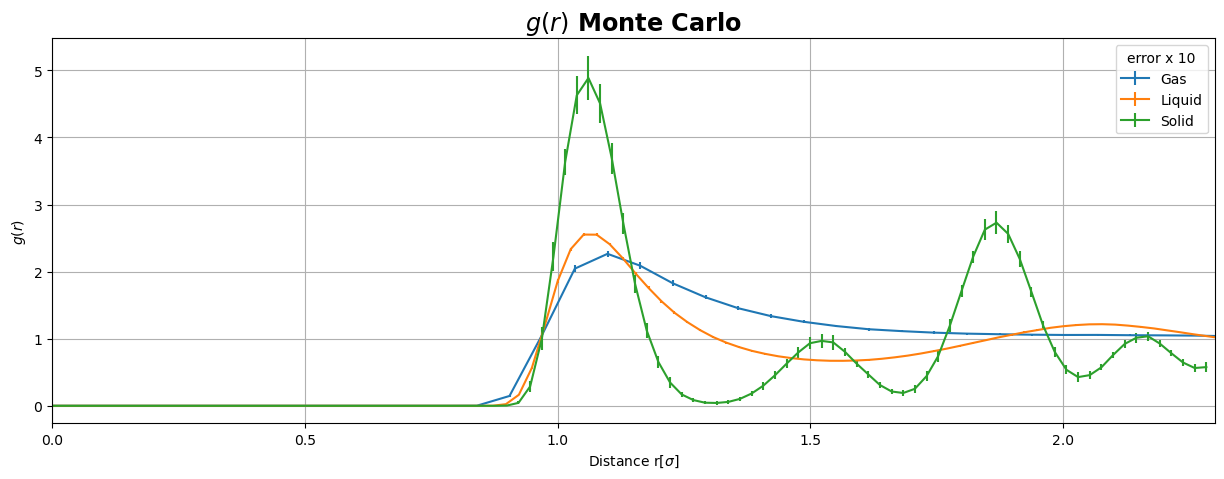

In [42]:
fig=plt.figure(figsize=(15, 5)) # figsize=(width, height)

for i in range(0,3):

    x,gdr,err = np.loadtxt("../DATA/gofr/MC/"+phase[i]+"/gofr.dat", usecols=(0,1,2), unpack='true',skiprows=1)

    plt.errorbar(x, gdr, err*10, marker='', label=phase[i])
    plt.title('$g(r)$ Monte Carlo', size='xx-large', weight='bold')
    plt.ylabel('$g(r)$')
    plt.xlabel('Distance r[$\sigma$]')
    plt.xlim(0,2.3)
    plt.grid(True)
    plt.legend(title='error x 10')

    
plt.show()


### Exercise 07.4

By means of your upgraded NSL simulator code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

`input.dat` for MD simulation of Gas,Liquid,Solid:

```bash
SIMULATION_TYPE        0
RESTART                0
TEMP                    0.955 / 1.9864 / 1.542
NPART                  108
RHO                    0.05 / 0.8 / 1.1
R_CUT                  5.0 / 2.5 / 2.2
DELTA                  0.0005
NBLOCKS                50
NSTEPS                 2000

ENDINPUT

```

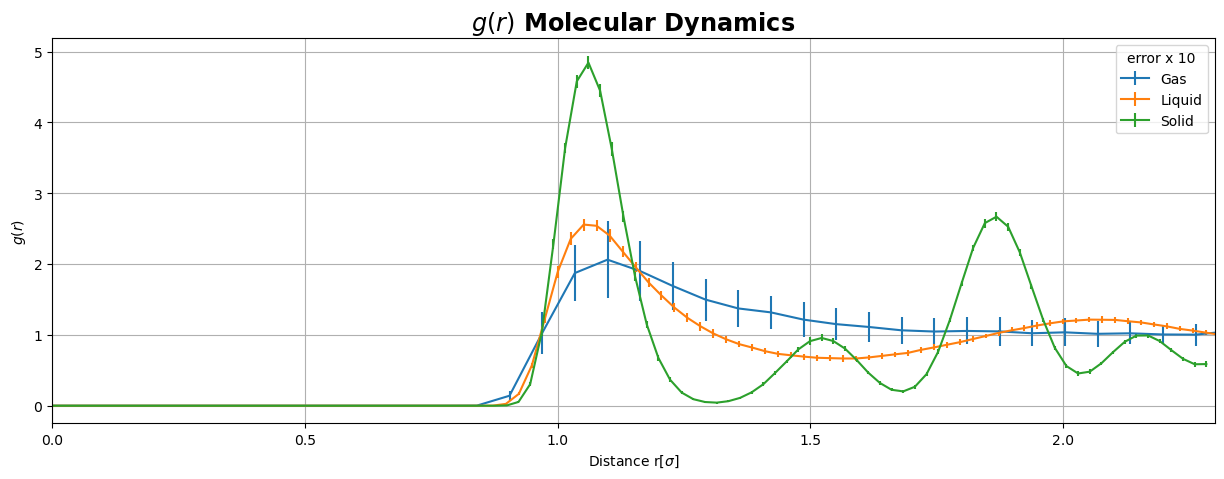

In [43]:
fig=plt.figure(figsize=(15, 5)) # figsize=(width, height)

for i in range(0,3):

    x,gdr,err = np.loadtxt("../DATA/gofr/MD/"+phase[i]+"/gofr.dat", usecols=(0,1,2), unpack='true',skiprows=1)

    plt.errorbar(x, gdr, err*10, marker='', label=phase[i])
    plt.title('$g(r)$ Molecular Dynamics', size='xx-large', weight='bold')
    plt.ylabel('$g(r)$')
    plt.xlabel('Distance r[$\sigma$]')
    plt.xlim(0,2.3)
    plt.grid(True)
    plt.legend(title = 'error x 10')

    
plt.show()


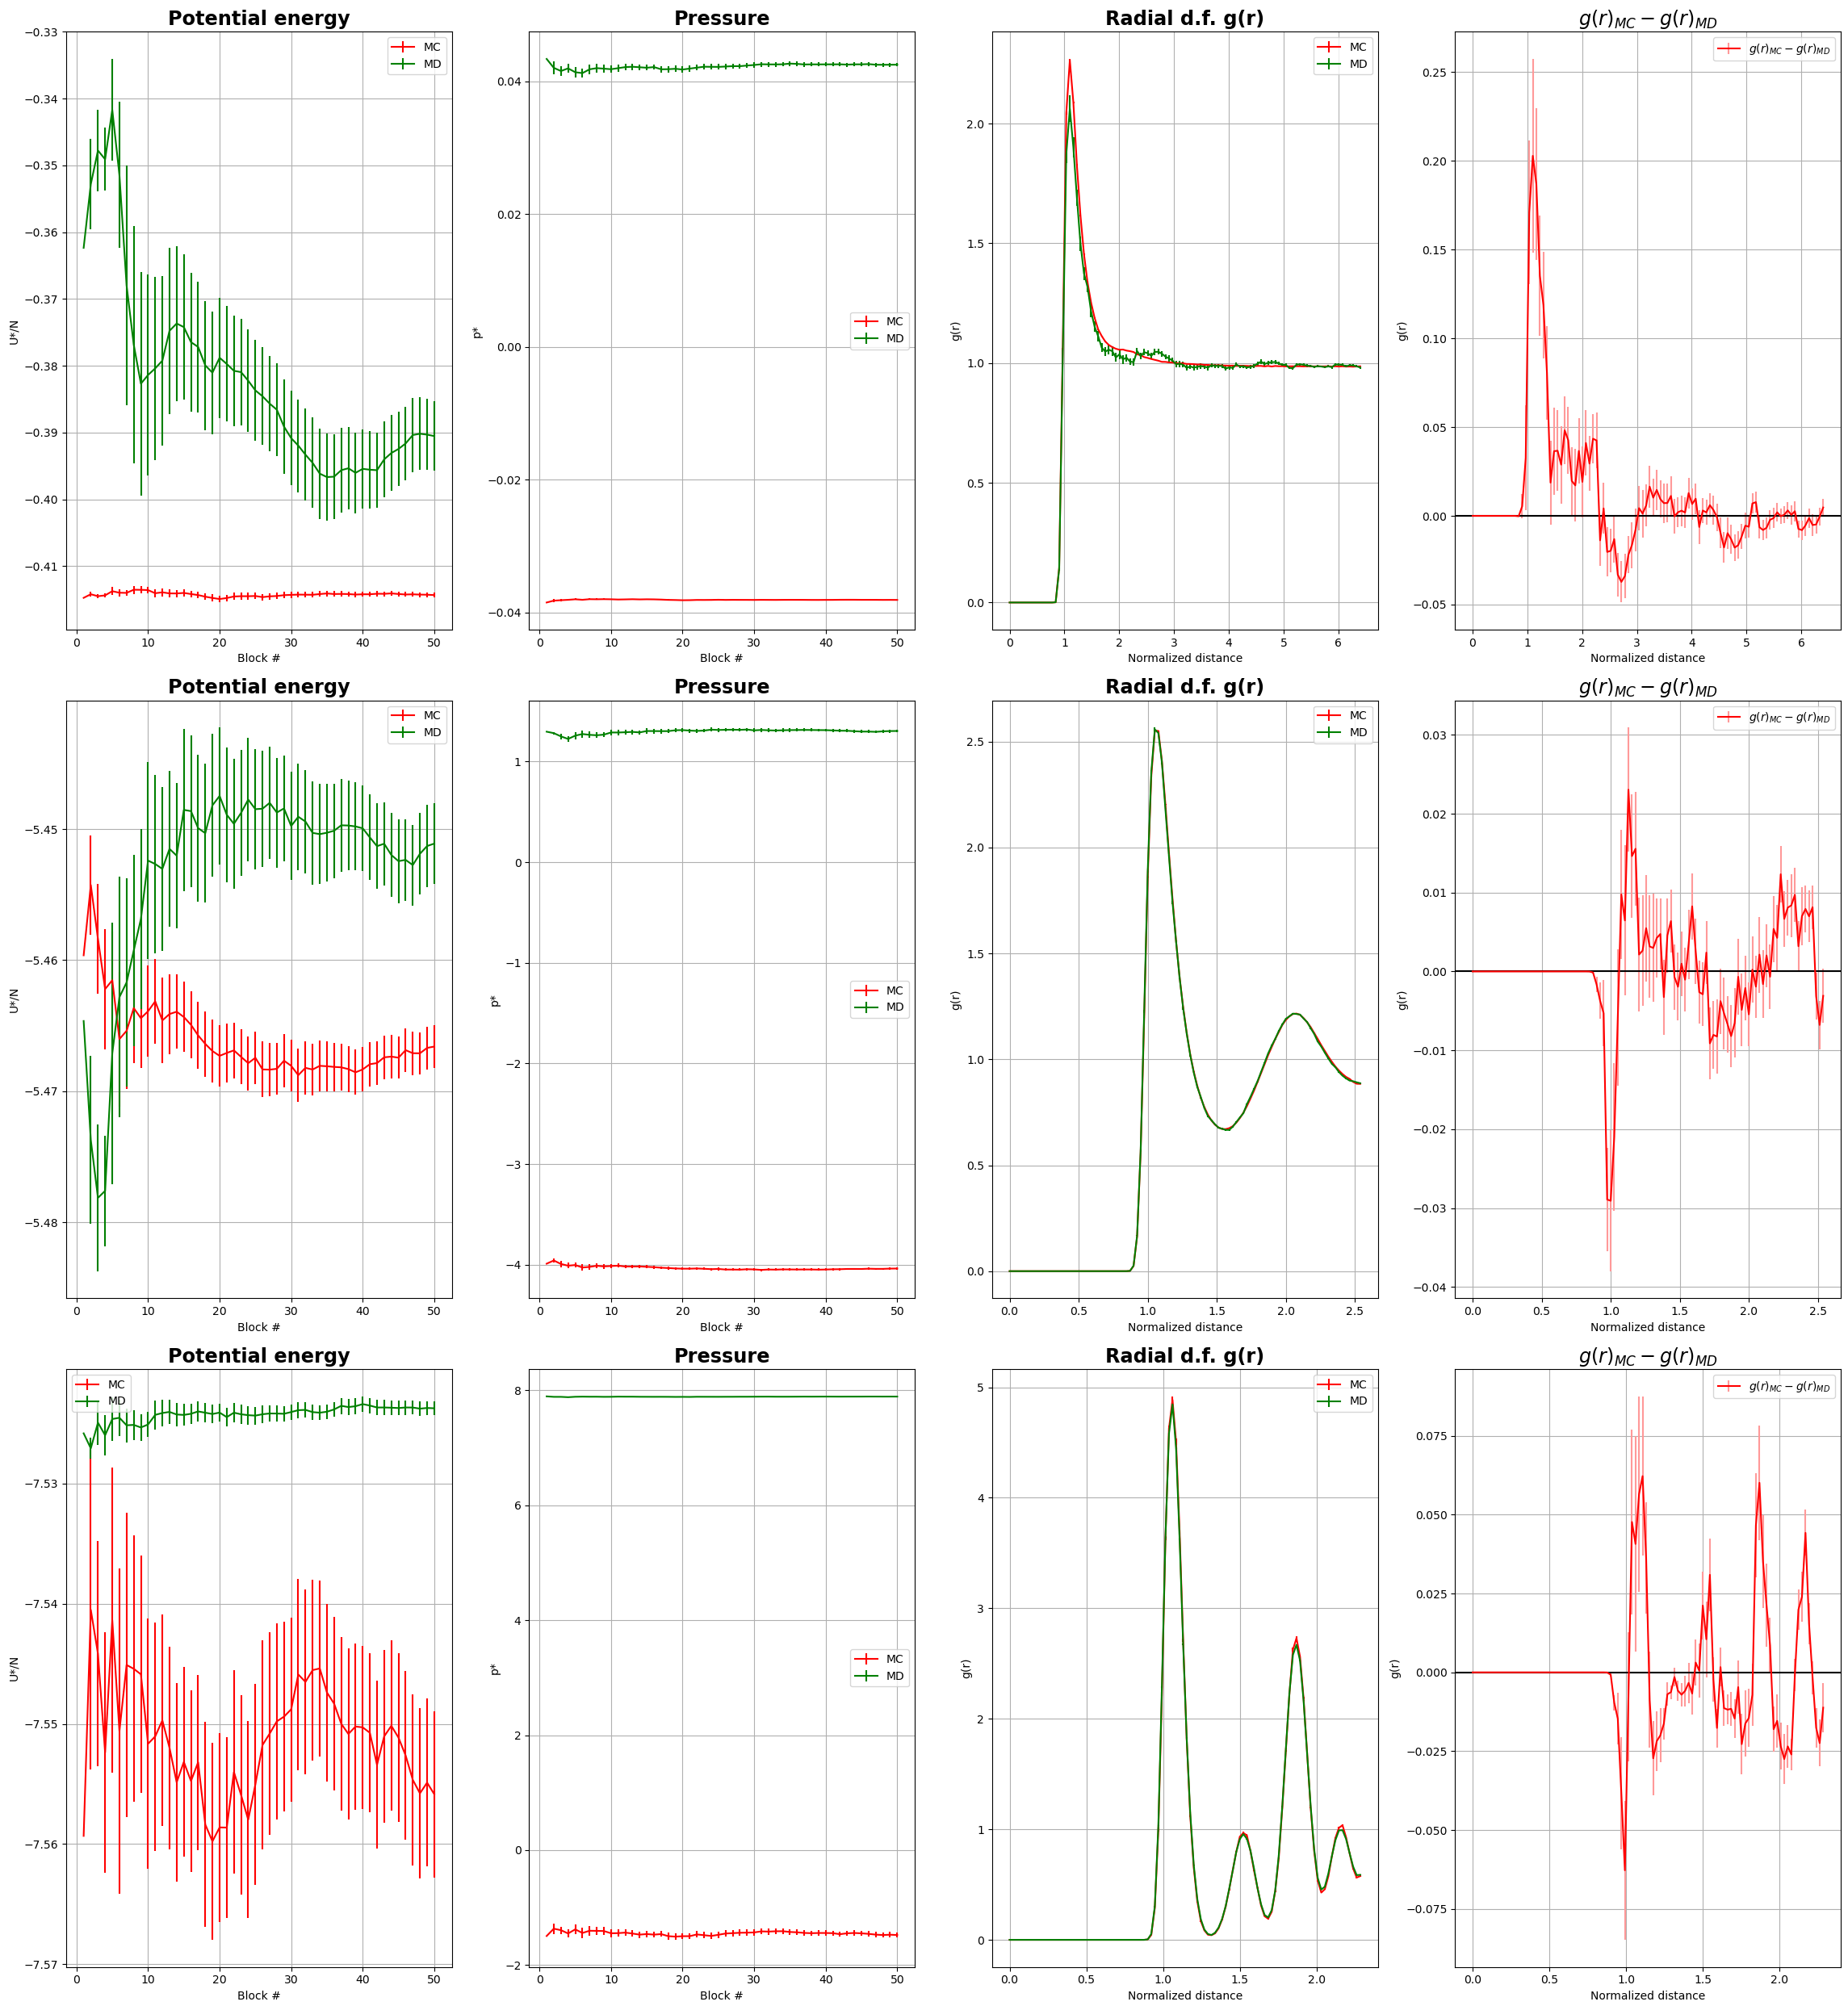

In [64]:
import matplotlib.pyplot as plt
import numpy as np

algorithm = ["MC", "MD"]
colors = {"MC": ["r", [1, 0.6, 0.6]], "MD": ["g", [0.6, 1, 0.6]]}
phase = ["Gas", "Liquid", "Solid"]
thermod_vars = ["potential_energy", "pressure", "gdr", "gdr_diff"]
titles = ["Potential energy", "Pressure", "Radial d.f. g(r)", "$g(r)_{MC}-g(r)_{MD}$"]
units = ["U*/N", "p*", "g(r)", "g(r)"]
ascix = ["Block #", "Block #", "Normalized distance", "Normalized distance"]

fig = plt.figure(figsize=(23, 25)) # figsize=(width, height)

for i, ph in enumerate(phase):
    for j, td_v in enumerate(thermod_vars):
        ax = fig.add_subplot(3, 4, i * len(thermod_vars) + j + 1)

        if td_v in ["pressure", "potential_energy"]:
            for alg in algorithm:
                x, y, err  = np.loadtxt(f"../DATA/gofr/{alg}/{ph}/{td_v}.dat", usecols=(0, 2, 3), unpack=True, skiprows=1)
                
                ax.errorbar(x, y, err, marker='', label=alg, color=colors[alg][0])

        if td_v == "gdr":
            for k, alg in enumerate(algorithm):
                x, gdr, err = np.loadtxt(f"../DATA/gofr/{alg}/{ph}/gofr.dat", usecols=(0, 1, 2), unpack=True)
                ax.errorbar(x, gdr, err, marker='', label=alg, color=colors[alg][0])

        if td_v == "gdr_diff":
            data_MC = np.loadtxt(f"../DATA/gofr/MC/{ph}/gofr.dat", usecols=(0, 1, 2), unpack=True, skiprows=1)
            data_MD = np.loadtxt(f"../DATA/gofr/MD/{ph}/gofr.dat", usecols=(1, 2), unpack=True, skiprows=1)
            x, gdrMC, errMC = data_MC
            gdrMD, errMD = data_MD
            y = gdrMC - gdrMD
            err = np.sqrt(errMC**2 + errMD**2)
            ax.errorbar(x, y, err, marker='', label="$g(r)_{MC}-g(r)_{MD}$", color=colors["MC"][0], ecolor=colors["MC"][1])
            ax.axhline(y=0, color="k")

        ax.set_title(titles[j], size='xx-large', weight='bold')
        ax.set_ylabel(units[j])
        ax.set_xlabel(ascix[j])
        ax.grid(True)
        ax.legend()

plt.tight_layout()
plt.show()
